# 5-Laboratory-04-11-2020
| Credits to the authors of the exercises: Andrea Pasini, Giuseppe Attanasio, Flavio Giobergia<br />| Master of Science in Data Science and Engineering, Politecnico di Torino, A.A. 2020-21

## New York Point Of Interests
The New York Point Of Interest dataset collects a sub-sample of the point of interests (POI) available inthe city of New York. It contains the coordinates of each point of interest and the category to which itbelongs to, specifying thetypeof the POI, for each POIcategory. There are four possible categories of POIs: amenity, shop, public_transport and highway. The fields available in the dataset are

- @id: a unique id for each point of interest.
- @lat: latitude coordinate of the POI in decimal degrees.
- @lon: longitude coordinate of the POI in decimal degrees.
- amenity name: if the POI category isamenityits type is reported in this field.
- shop: if the POI category isshopits type is reported in this field.
- public_transport: if the POI category ispublic transportits type is reported in this field.
- highway: if the POI category ishighwayits type is reported in this field

To identify which are the POIs belonging only to the New York City municipality, a further file is pro-vided. The New York City municipality POIs metadata file is composed by a single column containing the Ids of the POI of interest of the municipality. Then, a map of the New York municipality is provided as well.

### Questions

1. Load the New York Point Of Interest dataset exploiting Pandas APIs. Load the NY Municipality POIs ID metadata as well and filter out from the New York Point Of Interest data the records that do not belong to the New York municipality.
    - Which columns have been parsed?
    - Which is the type of the data inferred by Pandas?

In [1]:
import pandas as pd

ny_pois_id = pd.read_csv("../Datasets/New_York_Point_Of_Interest/ny_municipality_pois_id.csv", header=None)
ny_pois_id.head(5)

,0
0,42432939
1,42448838
2,42723103
3,42764076
4,42811266


In [2]:
df = pd.read_csv("../Datasets/New_York_Point_Of_Interest/pois_all_info", sep="\t",low_memory=False)
df.head(5)

,@id,@type,@lat,@lon,amenity,name,shop,public_transport,highway
0,42432939,node,40.814104,-73.949623,NaN,NaN,NaN,stop_position,NaN
1,42448838,node,40.761647,-73.949864,NaN,NaN,NaN,stop_position,NaN
2,42723103,node,40.852182,-73.772677,ferry_terminal,Hart Island Ferry Terminal,NaN,NaN,NaN
3,42764076,node,40.867164,-73.882158,NaN,Botanical Garden,NaN,stop_position,NaN
4,42811266,node,40.704807,-73.772734,NaN,NaN,NaN,stop_position,NaN


In [3]:
len(df),len(ny_pois_id)

(77884, 53530)

In [4]:
# transform the @id column as the index 
df.index = df["@id"]
# drop it
df = df.drop(columns=["@id"],axis=1)
# get just the ny pois
df = df.loc[ny_pois_id[0]]
df.head(5)

,@type,@lat,@lon,amenity,name,shop,public_transport,highway
@id,,,,,,,,
42432939,node,40.814104,-73.949623,NaN,NaN,NaN,stop_position,NaN
42448838,node,40.761647,-73.949864,NaN,NaN,NaN,stop_position,NaN
42723103,node,40.852182,-73.772677,ferry_terminal,Hart Island Ferry Terminal,NaN,NaN,NaN
42764076,node,40.867164,-73.882158,NaN,Botanical Garden,NaN,stop_position,NaN
42811266,node,40.704807,-73.772734,NaN,NaN,NaN,stop_position,NaN


In [5]:
len(df), len(set(df.index))

(53550, 53515)

It can be clearly seen that there are 35 duplicate indexes!

In [6]:
df[ df.groupby(level=0).size() > 1 ][:10]

<ipython-input-6-da8540b03c43>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[ df.groupby(level=0).size() > 1 ][:10]


,@type,@lat,@lon,amenity,name,shop,public_transport,highway
@id,,,,,,,,
2311190720,node,40.689851,-74.047667,ferry_terminal,Statue of Liberty Ferry Terminal,NaN,station,NaN
2311190720,node,40.689851,-74.047667,ferry_terminal,Statue of Liberty Ferry Terminal,NaN,station,NaN
2845183587,node,40.752096,-73.920563,parking,NaN,NaN,NaN,NaN
2845183587,node,40.752096,-73.920563,NaN,NaN,NaN,NaN,NaN
2845183587,node,40.752096,-73.920563,parking,NaN,NaN,NaN,NaN
2845183587,node,40.752096,-73.920563,NaN,NaN,NaN,NaN,NaN
3765548245,node,40.670957,-74.011591,parking_entrance,NaN,NaN,NaN,NaN
3765548245,node,40.670957,-74.011591,NaN,NaN,NaN,NaN,NaN
3765548245,node,40.670957,-74.011591,parking_entrance,NaN,NaN,NaN,NaN


In [7]:
# we can drop those duplicates
df.drop_duplicates(keep=False,inplace=True)

2. For each column in the loaded dataset count the number of missing values.
    - What did you expect?
    - What can you infer from this first analysis?

In [8]:
df.isnull().sum()

@type                   0
@lat                    0
@lon                    0
amenity             28808
name                22954
shop                44785
public_transport    45122
highway             45939
dtype: int64

Well, there are several missing values, some of them are more important than others. For example it could be important to know what kind of amenity is a particular node rather than knowing its name. Well, I can infer that due to this "issue", It could be quite innaccurate the "distribution" of amenities around NYC. 

3. Now, analyze the distribution of the POI types for each POI category. Point of interest categories areamenity, shop, public_transport and highway. For each of them, plot a histogram showing thedistribution of the types of POI. Note that, for certain categories, due to the high number of types,bars and labels could not fit adequately in the figure. Hence, fix a threshold (a percentage one isbetter) and plot only the most frequent types.To simplify the subsequent analysis, use the retained top frequent POI types also for the followingexercises

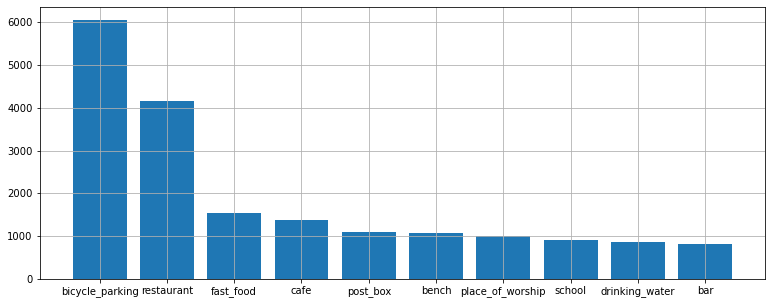

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(13,5))

# top 10 amenities
amenities = df["amenity"].value_counts().nlargest(10)
plt.bar(amenities.index, amenities.values)

plt.grid()
plt.show()

4. Show the points of interest on the New York map for a given category (e.g. amenity). To do so, you have to define a new function (or a new class) that, given the name of the POI category is able to show a scatter plot of the locations of the POI types, onto the New York municipality map, with adifferent color for each category.
    - Are you able to identify areas in which the concentration of a specific POI type is higher thenothers?
    - How can you better characterize the POI distributions?


Before to see some amenities in particular, I prefer to fit all the couples (lat,long) over the image.

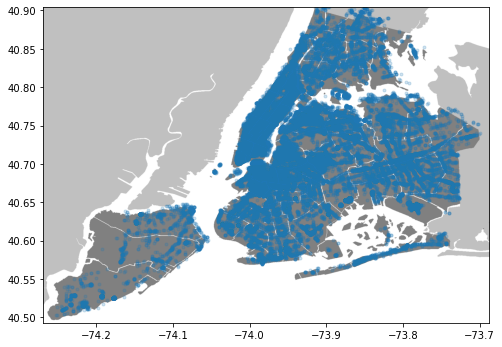

In [10]:
plt.figure(figsize=(8,14))
img = plt.imread("../Datasets/New_York_Point_Of_Interest/New_York_City_Map.PNG")

#in this way it will be horizontal
plt.scatter(df["@lon"],df["@lat"], marker=".", alpha=0.2)

axes = plt.gca()

# get limits on x and y, in order to fit the img
x_lim = axes.get_xlim()
y_lim = axes.get_ylim()

# I found those offsets using a brute-force approach 
plt.imshow(img,extent = [x_lim[0]+0.011, x_lim[1]-0.015, y_lim[0]+0.011, y_lim[1]-0.03])

No we can parameterize that graph, by using a "given" category

In [11]:
def plotScatterImg(amenity):
    plt.figure(figsize=(8,14))
    img = plt.imread("../Datasets/New_York_Point_Of_Interest/New_York_City_Map.PNG")
    
    df_am = df[df["amenity"] == amenity]
    df_am = df_am[["@lat","@lon"]]
    
    #in this way it will be horizontal
    plt.scatter(df_am["@lon"],df_am["@lat"], marker=".")

    axes = plt.gca()

    # get limits on x and y, in order to fit the img
    x_lim = axes.get_xlim()
    y_lim = axes.get_ylim()

    # I found those offset using a brute-force approach (try by try..)
    plt.imshow(img,extent = [x_lim[0]+0.011, x_lim[1]-0.015, 
                             y_lim[0]+0.011, y_lim[1]-0.03])

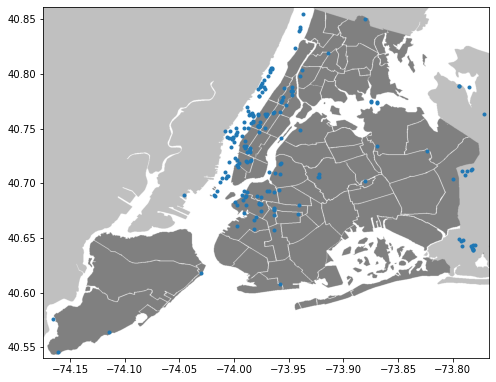

In [134]:
plotScatterImg("atm")

Well, of course a stronger concentration of points means a stonger presence of those amenities. Then, for a better understanding I introduced the parameter $\alpha$ in order to  have a darker color over the most concentrated areas

5. Discretize the POIs by geographical position. Define a new function (or class) that is able to split the geographical position of the POIs using a grid. Once defined the grid over the New York municipality,the function has to assign each POI to the cell to which it belongs to. The result should be a Pandas DataFrame with a new column containing the cell_id for each POI.

In order to discretize, we need the map references. Firstly, we'll need to build up the coordinates interval for both x and y, by using linspace. The indices of those values will be used for placing the nodes on the actual grid. The value of the grid will be the "id" for the discretization

In [13]:
row = np.linspace(40.55, 40.90, num=8)
col = np.linspace(-74.2,-73.7, num=6)
# coordinates
(row,col) 

NameError: name 'np' is not defined

In [ ]:
grid = np.linspace(0,(len(row)*len(col)-1),
                      (len(row)*len(col)),
                      dtype=int).reshape(len(row),len(col))
# values
grid

In [14]:
import numpy as np
import math

def discretize(df_cont):
    # lat : limit values
    row = np.linspace(40.55, 40.90, num=8)
    # lon : limit values
    col = np.linspace(-74.2,-73.7, num=6)
    
    # build the reference grid
    # those values will be the "id"
    grid = np.linspace(0,(len(row)*len(col)-1),
                      (len(row)*len(col)),
                      dtype=int).reshape(len(row),len(col))
    """
        the indexes will be
        row_i = math.floor((40.90-lat)/0.05)
        col_i = math.ceil((74.2+lon)/0.1)
    """
    return df_cont.apply(lambda x: grid[math.floor((40.90-x['@lat'])/0.05)][math.ceil((74.2+x['@lon'])/0.1)],axis=1)

In [15]:
df["cell_id"] = discretize(df)
df.sample()

,@type,@lat,@lon,amenity,name,shop,public_transport,highway,cell_id
@id,,,,,,,,,
1748991486,node,40.790568,-73.947301,restaurant,NaN,NaN,NaN,NaN,15


6. Now you have to identify how many times a POI type is contained in each cell, for each category.Create a new DataFrame containing the cell_id as index, the POI types as columns and the count of the occurrences of each type, in each cell, as values.

In [135]:
df_cells = df.pivot_table(index='cell_id', columns='amenity',aggfunc='count')
df_cells = df_cells.fillna(0)
df_cells.head()

@lat                                                          \
amenity Green_Market Statue animal_boarding animal_shelter arts_centre   atm   
cell_id                                                                        
3                0.0    0.0             0.0            0.0         0.0   4.0   
4                0.0    0.0             0.0            0.0         0.0   1.0   
5                0.0    0.0             0.0            0.0         0.0   0.0   
9                0.0    0.0             0.0            1.0         1.0  11.0   
10               0.0    0.0             0.0            0.0         2.0   0.0   

                               ...     shop                         \
amenity  bank  bar  bbq bench  ... training university urgent_care   
cell_id                        ...                                   
3         8.0  9.0  0.0  39.0  ...      0.0        0.0         0.0   
4         8.0  6.0  0.0   7.0  ...      0.0        0.0         0.0   
5         0.0  0.0  0.0   0.0  ...      0.0        0.0         0.0   
9        27.0  8.0  2.0  23.0  ...      0.0        0.0         0.0   
10        9.0  3.0  0.0   9.0  ...      0.0        0.0         0.0   

                                                                    \
amenity vehicle_inspection vending_machine veterinary waste_basket   
cell_id                                                              
3                      0.0             0.0        0.0          0.0   
4                      0.0             0.0        0.0          0.0   
5                      0.0             0.0        0.0          0.0   
9                      0.0             0.0        0.0          0.0   
10                     0.0             0.0        0.0          0.0   

                                               \
amenity waste_disposal waste_transfer_station   
cell_id                                         
3                  0.0                    0.0   
4                  0.0                    0.0   
5                  0.0                    0.0   
9                  0.0                    0.0   
10                 0.0                    0.0   

                                                
amenity wifi;telephone;device_charging_station  
cell_id                                         
3                                          0.0  
4                                          0.0  
5                                          0.0  
9                                          0.0  
10                                         0.0  

[5 rows x 833 columns]

7. For the categories amenities and shop identify if there exist a correlation between the location of different POI types. Compute the pairwise correlation between the columns of the cell-type DataFrame and show it through a heatmap chart
    - Are you able to identify which are the POI types more correlated between each other? Whatdoes it mean?
    - Which are the more correlated tuples? Do they belong to the same category?

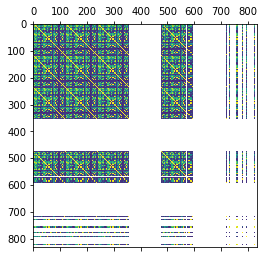

In [143]:
plt.matshow(df_cells.corr())
plt.show()

## Flight Delay Data
This dataset is made available by the Bureau of Transportation Statistics of the United States Departmentof Transportation. Measuring the performance of flight carriers (e.g. American Airlines, EasyJet) is extremely important for the transportation department and, for this reason, all the information related to each flight are constantly monitored and collected in huge databases by the Department of Transportation. To the aim of this laboratory, just a small set of information has been extracted. The dataset contains the Carrier On-Time Performance information collected from 01-01-2017 until 31-01-2017 for all the flights in the United States. Each row represents a flight in a specific day.Some of the most useful fields in the dataset are:
- FL_DATE: day of the flight in format YYYY-mm-dd.
- TAIL_NUM: aircraft registration number, unique to a single aircraft.
- UNIQUE_CARRIER: flight carrier id.
- FL_NUM: number of the flight.
- ORIGIN: departure airport code.
- DEST: destination airport code.
- CRS_DEP_TIME: scheduled departure time (local time: HHMM) shown in the carriers’ Computerized Reservations Systems (CRS)
- DEP_TIME: actual departure time (local time: HHMM)
- DEP_DELAY: overall delay at departure. Difference in minutes (floating point number) between scheduled and actual departure time. Early departures set to 0.
- CRS_ARR_TIME: scheduled arrival time (local time: HHMM) shown in the carriers’ Computerized Reservations Systems (CRS)
- ARR_TIME: actual arrival time (local time: HHMM)
- ARR_DELAY: overall delay. Difference in minutes (floating point number) between scheduled andactual arrival time. Early arrivals show negative numbers.
- CARRIER_DELAY: delay in minutes (floating point number) caused by the carrier.
- WEATHER_DELAY: delay in minutes (floating point number) caused by the weather.
- NAS_DELAY: delay in minutes (floating point number) caused by the National Air System (NAS).
- SECURITY_DELAY: delay in minutes (floating point number) caused by the security.
- LATE_AIRCRAFT_DELAY: delay in minutes (floating point number) caused by the aircraft.

### Questions
1. 